In [36]:
from pandas import read_csv, merge
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option.max_columns = 999
pd.set_option.max_rows = 999

In [37]:
data_base_path = Path(r'../data/')
train_X_path = Path(data_base_path / 'training_set_features.csv')
train_y_path = Path(data_base_path / 'training_set_labels.csv')
test_X_path = Path(data_base_path / 'test_set_features.csv')

In [38]:
train_X = read_csv(train_X_path)
train_y = read_csv(train_y_path)
test_X = read_csv(test_X_path)

In [39]:
def value(_, x):
    return int(np.round(_/100.*x.sum(), 0))

def plot_pie(x, labels, title):
    _, ax = plt.subplots(figsize=(3, 3)) 
    wedges, texts, autotexts = ax.pie(x, labels=labels, autopct=lambda _: value(_, x))
    ax.axis('off')
    ax.set_title(title)
    plt.setp(autotexts)
    plt.show()

# Exploring training labels

In [40]:
pd.crosstab(
    train_y["h1n1_vaccine"], 
    train_y["seasonal_vaccine"], 
    # margins=True,
    normalize=False
)


seasonal_vaccine,0,1
h1n1_vaccine,,
0,13295,7738
1,977,4697


In [41]:
# import warnings
# warnings.filterwarnings('ignore')

# column = 'none'
# def count_none(row):
#     count = row.h1n1_vaccine + row.seasonal_vaccine
#     return count == 0

# train_y[column] = train_y.apply(lambda _: count_none(_), axis=1)

# plot_pie(
#     labels=(col := train_y[column].value_counts()).index, 
#     x=col.values,
#     title=f'train subjects that got {column}'
# )

# column = 'both'
# def count_both(row):
#     count = row.h1n1_vaccine + row.seasonal_vaccine
#     return count == 2

# train_y[column] = train_y.apply(lambda _: count_both(_), axis=1)

# plot_pie(
#     labels=(col := train_y[column].value_counts()).index, 
#     x=col.values,
#     title=f'train subjects that got {column}'
# )

In [42]:
# column = 'h1n1_only'
# def count_h1n1_only(row):
#     return row.h1n1_vaccine == 1 and row.seasonal_vaccine == 0

# train_y[column] = train_y.apply(lambda _: count_h1n1_only(_), axis=1)

# plot_pie(
#     labels=(col := train_y[column].value_counts()).index, 
#     x=col.values,
#     title=f'train subjects that got {column}'
# )

In [43]:
# column = 'seasonal_only'
# def count_seasonal_only(row):
#     return row.h1n1_vaccine == 0 and row.seasonal_vaccine == 1

# train_y[column] = train_y.apply(lambda _: count_seasonal_only(_), axis=1)

# plot_pie(
#     labels=(col := train_y[column].value_counts()).index, 
#     x=col.values,
#     title=f'train subjects that got {column}'
# )

# EXPLORE TRAINING FEATURES

In [44]:
train_y.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

In [45]:
train_X.columns


Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [46]:
# groups
h1n1_cols = ['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'opinion_h1n1_sick_from_vacc', 'opinion_h1n1_risk']
seasonal_cols = ['doctor_recc_seasonal', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']
behavior_cols = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face']
personal_cols = ['chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status']
region_cols = ['hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation']

In [47]:
pd.crosstab(
    train_X['age_group'], 
    train_y["seasonal_vaccine"], 
    # margins=True,
    # normalize=True
)


seasonal_vaccine,0,1
age_group,,
18 - 34 Years,3731,1484
35 - 44 Years,2453,1395
45 - 54 Years,3136,2102
55 - 64 Years,2719,2844
65+ Years,2233,4610


In [48]:
pd.crosstab(
    train_X['age_group'], 
    train_y["h1n1_vaccine"], 
    # margins=True,
    # normalize=True
)


h1n1_vaccine,0,1
age_group,,
18 - 34 Years,4224,991
35 - 44 Years,3087,761
45 - 54 Years,4218,1020
55 - 64 Years,4212,1351
65+ Years,5292,1551


In [49]:
pd.crosstab(
    train_X['health_insurance'], 
    train_y["h1n1_vaccine"], 
    # margins=True,
    # normalize=True
)

h1n1_vaccine,0,1
health_insurance,,
0.0,1480,256
1.0,8663,4034


In [50]:
pd.crosstab(
    train_X['health_insurance'], 
    train_y["seasonal_vaccine"], 
    # margins=True,
    # normalize=True
)

seasonal_vaccine,0,1
health_insurance,,
0.0,1338,398
1.0,5866,6831


In [51]:
# train.info()

In [52]:
import seaborn as sns

In [53]:
# fig = plt.figure(figsize=(5, 5))
# sns.heatmap(train_h1n1.corr(), annot=True, center=True)
# plt.show()

In [54]:
# fig = plt.figure(figsize=(5, 5))
# sns.heatmap(train_seasonal.corr(), annot=True, center=True)
# plt.show()

In [55]:
# train_region = train[region_cols + ['h1n1_vaccine', 'seasonal_vaccine']]
# train_region.fillna(0, inplace=True)
# fig = plt.figure(figsize=(4, 4))
# sns.heatmap(train_region.corr(), annot=True, center=True)
# plt.show()

In [56]:
# train_behavior = train[behavior_cols + ['h1n1_vaccine', 'seasonal_vaccine']]
# train_behavior.fillna(0, inplace=True)
# fig = plt.figure(figsize=(7, 7))
# sns.heatmap(train_behavior.corr(), annot=True, center=True)
# plt.show()

In [57]:
# train_personal = train[personal_cols + ['h1n1_vaccine', 'seasonal_vaccine']]
# train_personal.fillna(0, inplace=True)
# fig = plt.figure(figsize=(7, 7))
# sns.heatmap(train_personal.corr(), annot=True, center=True)
# plt.show()

In [58]:
train_X = pd.get_dummies(train_X, columns = ['hhs_geo_region', 'census_msa', 'employment_occupation', 'employment_industry', 'employment_status', 'rent_or_own',
                                         'marital_status', 'race', 'sex'])

In [59]:
# train_X.columns

In [60]:
# train.age_group.value_counts(dropna=False)

In [61]:
from numpy import nan



def age_group(v):
    if '18' in v:
        return 0
    if '35' in v: 
        return 1
    elif '45' in v:
        return 2
    elif '55' in v:
        return 3
    return 4

train_X['age_group'] = train_X.age_group.apply(lambda _: age_group(_))

def education(v):
    if type(v) == float:
        return nan
    if '<' in v: 
        return 0
    elif '12' in v:
        return 1
    elif 'Some' in v:
        return 2
    return 3

train_X['education'] = train_X.education.apply(lambda _: education(_))

def ordinal_poverty(v):
    if type(v) == float:
        return nan
    if '<' in v: 
        return 1
    elif '>' in v:
        return 2
    return 0

income_poverty_numerical = train_X.income_poverty.apply(lambda _: ordinal_poverty(_))
train_X['income_poverty'] = income_poverty_numerical


In [62]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 97 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   respondent_id                         26707 non-null  int64  
 1   h1n1_concern                          26615 non-null  float64
 2   h1n1_knowledge                        26591 non-null  float64
 3   behavioral_antiviral_meds             26636 non-null  float64
 4   behavioral_avoidance                  26499 non-null  float64
 5   behavioral_face_mask                  26688 non-null  float64
 6   behavioral_wash_hands                 26665 non-null  float64
 7   behavioral_large_gatherings           26620 non-null  float64
 8   behavioral_outside_home               26625 non-null  float64
 9   behavioral_touch_face                 26579 non-null  float64
 10  doctor_recc_h1n1                      24547 non-null  float64
 11  doctor_recc_sea

In [63]:
train = merge(train_X, train_y, on='respondent_id')
train.dropna(inplace=True)
train_X = train.drop(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1)
train_y = train[['h1n1_vaccine', 'seasonal_vaccine']]

# SPLIT

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
train_X_split, val_X, train_y_split, val_y = train_test_split(train_X, train_y, test_size=0.25, shuffle=True, random_state=85)

In [66]:
train_y_h1n1 = train_y_split['h1n1_vaccine']
train_y_seasonal_vaccine = train_y_split['seasonal_vaccine']

In [67]:
from sklearn.svm import SVC

In [68]:
svc_h1n1 = SVC(random_state=85, probability=True, kernel='linear')
svc_h1n1.fit(train_X_split, train_y_h1n1)

SVC(kernel='linear', probability=True, random_state=85)

In [69]:
svc_seas = SVC(random_state=85, probability=True, kernel='linear')
svc_seas.fit(train_X_split, train_y_seasonal_vaccine)

SVC(kernel='linear', probability=True, random_state=85)

In [99]:
y_preds_h1n1 = svc_h1n1.predict_proba(val_X)
y_preds_seas = svc_seas.predict_proba(val_X)

In [100]:
from sklearn.metrics import classification_report, f1_score, roc_auc_score
print(classification_report(y_preds_h1n1, val_y['h1n1_vaccine']))
print(classification_report(y_preds_seas, val_y['seasonal_vaccine']))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [72]:
roc_h1 = roc_auc_score(y_preds_h1n1, val_y['h1n1_vaccine'], average='macro')
roc_se = roc_auc_score(y_preds_seas, val_y['seasonal_vaccine'], average='macro')
from numpy import mean 
m = mean((roc_h1, roc_se))
print(roc_h1, roc_se, m)

0.7880779341271068 0.8037961711063806 0.7959370526167437


In [73]:
f1_score(y_preds_h1n1, val_y['h1n1_vaccine'])

0.6699386503067485

In [74]:
f1_score(y_preds_seas, val_y['seasonal_vaccine'])

0.8012211668928088

In [75]:
test_X

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN


In [76]:
from numpy import nan

test_X = pd.get_dummies(test_X, columns = [
    'hhs_geo_region', 'census_msa', 'employment_occupation', 'employment_industry', 'employment_status', 'rent_or_own', 'marital_status', 'race', 'sex'
])

In [77]:
def age_group(v):
    if '18' in v:
        return 0
    if '35' in v: 
        return 1
    elif '45' in v:
        return 2
    elif '55' in v:
        return 3
    return 4
test_X['age_group'] = test_X.age_group.apply(lambda _: age_group(_))

def education(v):
    if type(v) == float:
        return nan
    if '<' in v: 
        return 0
    elif '12' in v:
        return 1
    elif 'Some' in v:
        return 2
    return 3
test_X['education'] = test_X.education.apply(lambda _: education(_))

def ordinal_poverty(v):
    if type(v) == float:
        return nan
    if '<' in v: 
        return 1
    elif '>' in v:
        return 2
    return 0
test_X['income_poverty'] = test_X.income_poverty.apply(lambda _: ordinal_poverty(_))


In [78]:
ids =  test_X['respondent_id']
test_X.drop(columns=['respondent_id'], axis=1, inplace=True)

In [79]:
test_X.fillna(-1, inplace=True)

In [80]:
y_preds_h1 = svc_h1n1.predict_proba(test_X)
y_preds_se = svc_seas.predict_proba(test_X)

In [81]:
svc_h1n1.classes_

array([0, 1], dtype=int64)

In [82]:
y_preds_h1

array([[0.93656717, 0.06343283],
       [0.97568379, 0.02431621],
       [0.65984779, 0.34015221],
       ...,
       [0.81497441, 0.18502559],
       [0.9461399 , 0.0538601 ],
       [0.33535237, 0.66464763]])

In [83]:
from pandas import DataFrame

df = DataFrame(
    {
        'respondent_id': ids, 
        'h1n1_vaccine': y_preds_h1[:, 1], 
        'seasonal_vaccine': y_preds_se[:, 1]
    }
)


In [84]:
df.to_csv('submission_scv_linear.csv', index=False)

In [91]:
train_X.columns
svc_h1n1.coef_[0]

array([-2.39115317e-02,  1.61337316e-01,  2.05408389e-02, -8.01225660e-02,
        4.33086264e-02,  1.87626061e-02, -1.33728331e-01,  2.91477149e-02,
        1.15836290e-02,  1.60667949e+00, -4.82697014e-01,  6.84173270e-02,
        1.96549525e-01,  4.06472923e-01,  4.95005159e-01,  3.61632850e-01,
        3.77647996e-01,  3.06576572e-02,  1.13451241e-01,  1.26199986e-01,
       -8.51713701e-02,  1.11295434e-01,  7.60238453e-02,  6.25815391e-02,
       -2.21826463e-02, -1.45770297e-03,  3.60166385e-02,  1.02105921e-01,
       -2.94522785e-01, -2.58434490e-02, -2.60174655e-02,  6.94029367e-02,
       -1.35111818e-01,  7.73941137e-02,  7.57679950e-02,  1.20807913e-01,
       -3.22937932e-02,  5.48442670e-02, -2.25504738e-02,  4.99692622e-02,
       -2.29224527e-01, -8.26942109e-02,  1.28896258e+00,  3.49096624e-01,
       -1.63925668e-01, -1.42333450e-01, -1.83355802e-01,  4.91929558e-02,
        2.71211418e-01, -2.93815916e-01, -4.30426611e-02, -2.60865953e-01,
       -5.95190056e-01,  

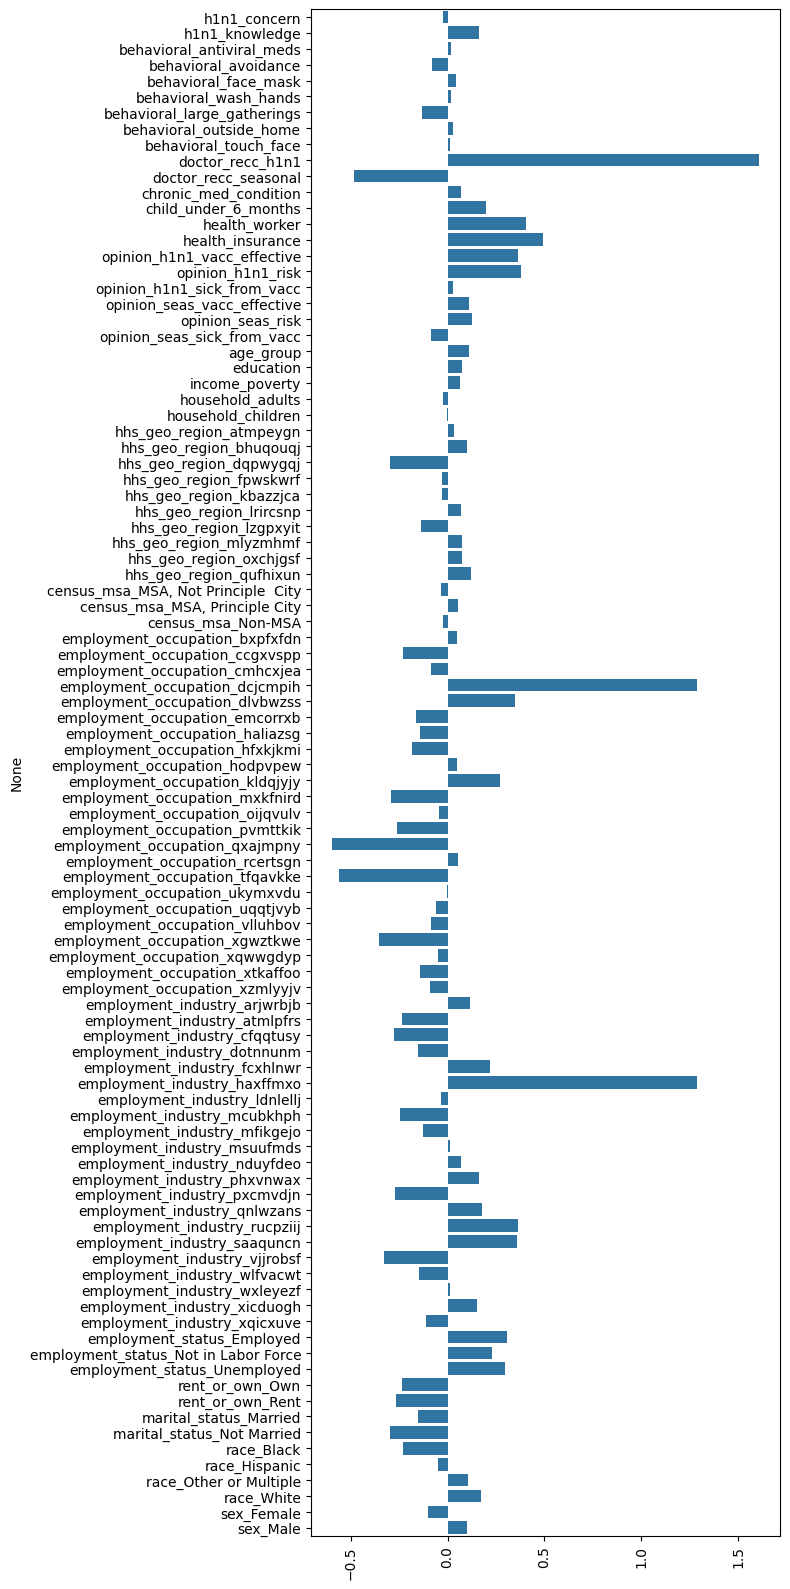

array([[-2.39115317e-02,  1.61337316e-01,  2.05408389e-02,
        -8.01225660e-02,  4.33086264e-02,  1.87626061e-02,
        -1.33728331e-01,  2.91477149e-02,  1.15836290e-02,
         1.60667949e+00, -4.82697014e-01,  6.84173270e-02,
         1.96549525e-01,  4.06472923e-01,  4.95005159e-01,
         3.61632850e-01,  3.77647996e-01,  3.06576572e-02,
         1.13451241e-01,  1.26199986e-01, -8.51713701e-02,
         1.11295434e-01,  7.60238453e-02,  6.25815391e-02,
        -2.21826463e-02, -1.45770297e-03,  3.60166385e-02,
         1.02105921e-01, -2.94522785e-01, -2.58434490e-02,
        -2.60174655e-02,  6.94029367e-02, -1.35111818e-01,
         7.73941137e-02,  7.57679950e-02,  1.20807913e-01,
        -3.22937932e-02,  5.48442670e-02, -2.25504738e-02,
         4.99692622e-02, -2.29224527e-01, -8.26942109e-02,
         1.28896258e+00,  3.49096624e-01, -1.63925668e-01,
        -1.42333450e-01, -1.83355802e-01,  4.91929558e-02,
         2.71211418e-01, -2.93815916e-01, -4.30426611e-0

In [97]:
fig = plt.figure(figsize=(8,16))
sns.barplot(y=train_X.columns, x=svc_h1n1.coef_[0], orient='h')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("feature_selection.png")
plt.show()


svc_h1n1.coef_

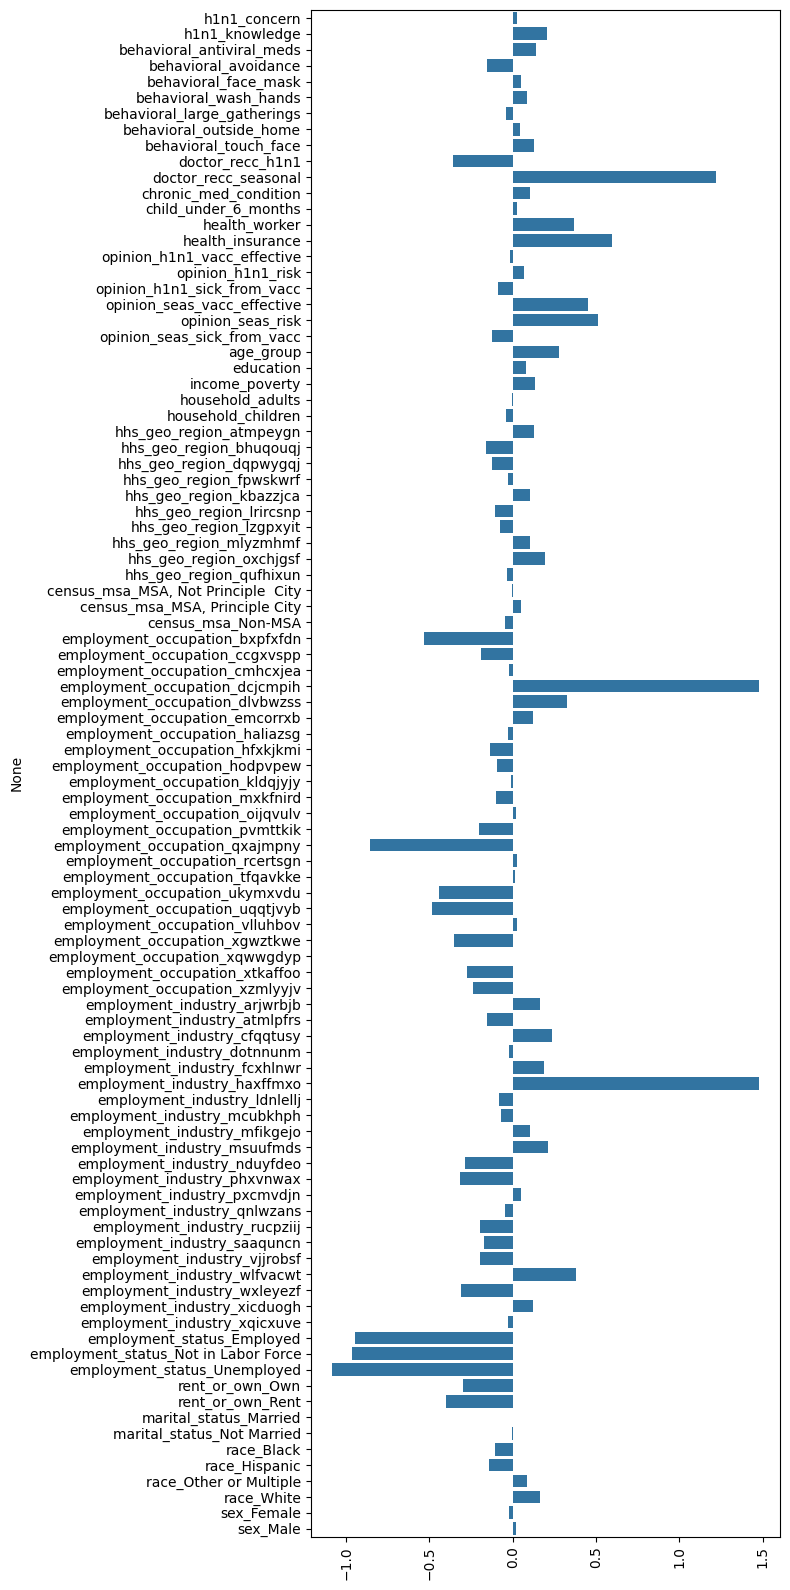

array([[-2.39115317e-02,  1.61337316e-01,  2.05408389e-02,
        -8.01225660e-02,  4.33086264e-02,  1.87626061e-02,
        -1.33728331e-01,  2.91477149e-02,  1.15836290e-02,
         1.60667949e+00, -4.82697014e-01,  6.84173270e-02,
         1.96549525e-01,  4.06472923e-01,  4.95005159e-01,
         3.61632850e-01,  3.77647996e-01,  3.06576572e-02,
         1.13451241e-01,  1.26199986e-01, -8.51713701e-02,
         1.11295434e-01,  7.60238453e-02,  6.25815391e-02,
        -2.21826463e-02, -1.45770297e-03,  3.60166385e-02,
         1.02105921e-01, -2.94522785e-01, -2.58434490e-02,
        -2.60174655e-02,  6.94029367e-02, -1.35111818e-01,
         7.73941137e-02,  7.57679950e-02,  1.20807913e-01,
        -3.22937932e-02,  5.48442670e-02, -2.25504738e-02,
         4.99692622e-02, -2.29224527e-01, -8.26942109e-02,
         1.28896258e+00,  3.49096624e-01, -1.63925668e-01,
        -1.42333450e-01, -1.83355802e-01,  4.91929558e-02,
         2.71211418e-01, -2.93815916e-01, -4.30426611e-0

In [98]:
fig = plt.figure(figsize=(8,16))
sns.barplot(y=train_X.columns, x=svc_seas.coef_[0], orient='h')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("feature_selection.png")
plt.show()